In [1]:
# Imports
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plot_learning_curves(history, epochs=200, y_min=0):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)
#     plt.figure(2)
    plt.subplot(212)
    plt.plot(history.history['val_acc'], label='Val Accuracy')
    plt.plot(history.history['acc'], label = 'Training Accuracy')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

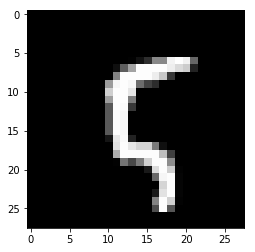

In [4]:
plt.imshow(x_train[100], cmap='gray')

In [5]:
def to_one_hot(array):
    num_unique = np.unique(array).shape[0]
    one_hot_array = np.zeros((array.shape[0], num_unique))
    one_hot_array[np.arange(array.shape[0]), array] = 1
    return one_hot_array

y_test = to_one_hot(y_test)
y_train = to_one_hot(y_train)

In [6]:
def normalize_features(array):
    return array / 255.0


def denormalize_features(array):
    return (np.round(array * 255)).astype(int)

In [7]:
from keras.layers import Conv3D

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s - loss: 0.4140 - acc: 0.8825 - val_loss: 0.2081 - val_acc: 0.9424
Epoch 2/10
48000/48000 [==============================] - 2s - loss: 0.2136 - acc: 0.9390 - val_loss: 0.1536 - val_acc: 0.9553
Epoch 3/10
48000/48000 [==============================] - 2s - loss: 0.1651 - acc: 0.9521 - val_loss: 0.1282 - val_acc: 0.9640
Epoch 4/10
48000/48000 [==============================] - 2s - loss: 0.1384 - acc: 0.9589 - val_loss: 0.1163 - val_acc: 0.9671
Epoch 5/10
48000/48000 [==============================] - 2s - loss: 0.1198 - acc: 0.9651 - val_loss: 0.1068 - val_acc: 0.9688
Epoch 6/10
48000/48000 [==============================] - 2s - loss: 0.1081 - acc: 0.9675 - val_loss: 0.1030 - val_acc: 0.9713
Epoch 7/10
48000/48000 [==============================] - 2s - loss: 0.0989 - acc: 0.9704 - val_loss: 0.0987 - val_acc: 0.9708
Epoch 8/10
48000/48000 [==============================] - 2s 

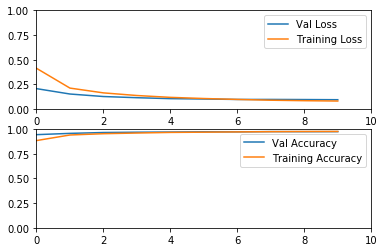

In [8]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(.2))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                               verbose=1, save_best_only=True)

sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(rms, loss='categorical_crossentropy', metrics=['accuracy'])
EPOCHS = 10

history = model.fit(normalize_features(x_train), y_train,
                    batch_size=100, epochs=EPOCHS,
                    validation_split=.2, callbacks=[checkpointer],
                    verbose=1)
plot_learning_curves(history, EPOCHS, y_min=0)

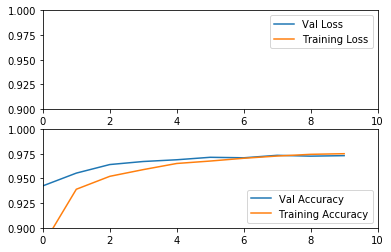

In [10]:
plot_learning_curves(history, EPOCHS, y_min=.9)

In [8]:
model.load_weights('mnist.model.best.hdf5')

NameError: name 'model' is not defined

In [11]:
dict([i for i in zip(model.metrics_names, model.evaluate(x_test, y_test))])

 9376/10000 [===========================>..] - ETA: 0s

{'acc': 0.97399999999999998, 'loss': 0.41615544418096545}

In [184]:
model.predict_proba(normalize_features(x_test[100:101]))

1/1 [==============================] - 0s


array([[  1.10884044e-04,   2.96025682e-04,   4.04190086e-03,
          1.42042001e-04,   8.39610075e-05,   1.85187382e-04,
          9.94636238e-01,   4.46925987e-05,   4.20725293e-04,
          3.84313171e-05]], dtype=float32)

# Can we do the same thing with CNNs?

### first try toy example from udacity

In [92]:
(x_train.shape[1], x_train.shape[2], 1)

(28, 28)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=10,
                 kernel_size=3,
                 strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 10)        100       
Total params: 100.0
Trainable params: 100
Non-trainable params: 0.0
_________________________________________________________________


In [87]:
filter_size = 3
num_filters = 32
prev_layer_depth = 3

num_filters * filter_size ** 2 * prev_layer_depth + num_filters

num_filters * (filter_size **2 * prev_layer_depth + 1)

896

### Now try against mnist numbers

In [111]:
x_train.shape

(60000, 28, 28)

In [11]:
from keras.layers import (Conv2D,
                          MaxPool2D,
                          GlobalAveragePooling2D)
from keras.models import Sequential

In [12]:
model = Sequential()
# model.add(Flatten(input_shape=x_train.shape[1:]))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(y_train.shape[1], activation='softmax'))
model.add(Conv2D(filters=10, kernel_size=7,
                 strides=2, padding='same',
                 activation='relu',
                 input_shape=(x_train.shape[1], x_train.shape[2], 1),
                 data_format='channels_last'))
model.add(Dropout(.1))
model.add(Conv2D(filters=20, kernel_size=5,
                 strides=2, padding='same',
                 activation='relu'))
model.add(Dropout(.1))
model.add(MaxPool2D((2, 2), strides=1))
model.add(Conv2D(filters=10, kernel_size=5,
                 strides=1, padding='valid',
                 activation='relu'))
model.add(Flatten())
# model.add(Dense(10, activation='relu'))
# model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 10)        500       
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 20)          5020      
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 20)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 20)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 10)          5010      
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)                0         
__________

In [20]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size=7,
                 strides=2, padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1),
                 data_format='channels_last'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 10)        500       
Total params: 500.0
Trainable params: 500
Non-trainable params: 0.0
_________________________________________________________________


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s - loss: 1.3982 - acc: 0.5498 - val_loss: 0.7496 - val_acc: 0.7854
Epoch 2/10
48000/48000 [==============================] - 16s - loss: 0.6500 - acc: 0.8022 - val_loss: 0.4088 - val_acc: 0.8861
Epoch 3/10
48000/48000 [==============================] - 16s - loss: 0.4409 - acc: 0.8686 - val_loss: 0.3122 - val_acc: 0.9162
Epoch 4/10
48000/48000 [==============================] - 16s - loss: 0.3384 - acc: 0.8994 - val_loss: 0.2291 - val_acc: 0.9350
Epoch 5/10
48000/48000 [==============================] - 16s - loss: 0.2778 - acc: 0.9175 - val_loss: 0.2064 - val_acc: 0.9428
Epoch 6/10
48000/48000 [==============================] - 16s - loss: 0.2276 - acc: 0.9328 - val_loss: 0.1711 - val_acc: 0.9503
Epoch 7/10
48000/48000 [==============================] - 16s - loss: 0.1950 - acc: 0.9405 - val_loss: 0.1447 - val_acc: 0.9602
Epoch 8/10
48000/48000 [==============================

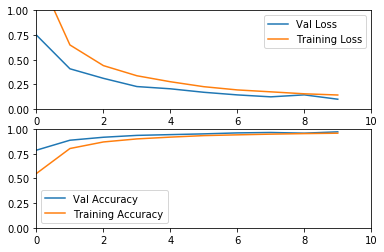

In [272]:
EPOCHS = 10
checkpointer = ModelCheckpoint(filepath='mnist.model.bestconv2d.hdf5',
                               verbose=1, save_best_only=True)
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(rms, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(normalize_features(x_train).reshape(60000, 28, 28, 1),
                    y_train, batch_size=1000, epochs=EPOCHS,
                    validation_split=.2, callbacks=[checkpointer],
                    verbose=1)
plot_learning_curves(history, EPOCHS, y_min=0)

In [213]:
model.evaluate(normalize_features(x_test).reshape(10000, 28, 28, 1), y_test)

 9856/10000 [============================>.] - ETA: 0s

[0.087898774483986197, 0.97270000000000001]

In [273]:
model.evaluate(normalize_features(x_test).reshape(10000, 28, 28, 1), y_test)

 9984/10000 [============================>.] - ETA: 0s

[0.091130833792500199, 0.97140000000000004]

In [233]:
def normalize_number(pixel_matrix):
    normalized_features = normalize_features(pixel_matrix)
    reshaped = normalized_features.reshape(1, 28, 28, 1)
    return model.predict_classes(reshaped)

In [239]:
num = 3222

In [240]:
normalize_number(x_test[num])

1/1 [==============================] - 0s


array([6])

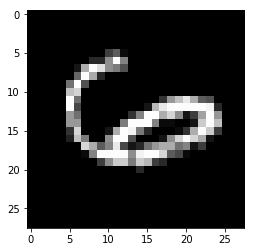

In [241]:
plt.imshow(x_test[num], cmap='gray')

In [274]:
thing = Sequential()
thing.add(MaxPool2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
thing.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_11 (MaxPooling (None, 50, 50, 15)        0         
Total params: 0.0
Trainable params: 0.0
Non-trainable params: 0.0
_________________________________________________________________
